In [1]:
# Diabetes Prediction Using K-Nearest Neighbors (KNN)

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score


In [2]:
# Setting up Kaggle API
from google.colab import files
files.upload()
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d akshaydattatraykhare/diabetes-dataset
!unzip -o diabetes-dataset.zip

# Load the dataset
dataset = pd.read_csv('diabetes.csv')

Saving kaggle.json to kaggle.json
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 18.4MB/s]
Archive:  diabetes-dataset.zip
  inflating: diabetes.csv            


In [3]:
# Display the first few rows of the dataset
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Print dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Generate descriptive statistics
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


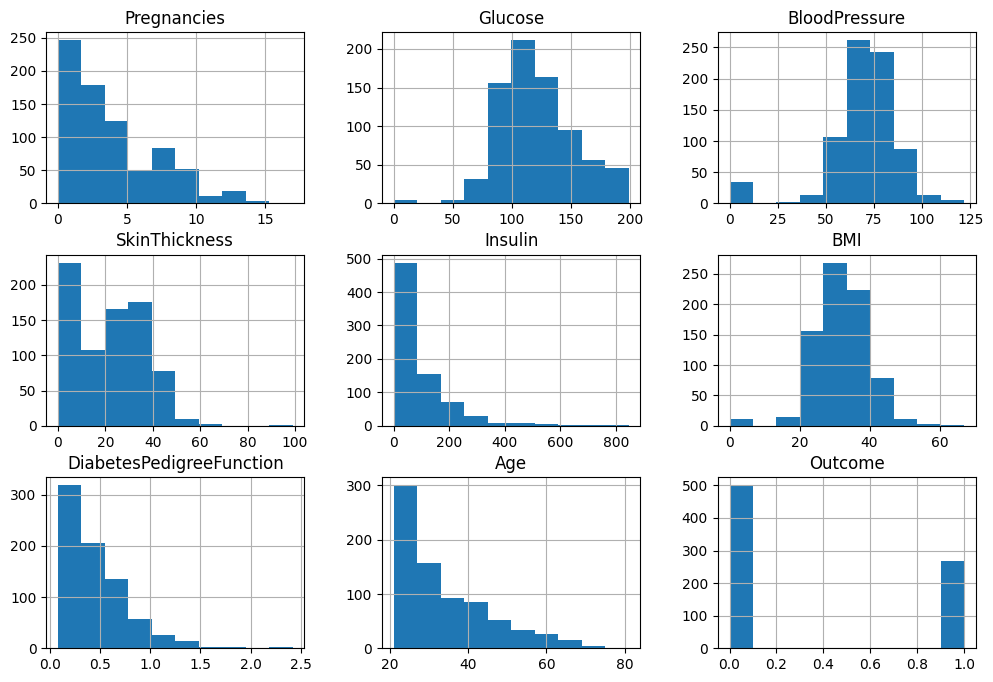

In [6]:
# Plot histograms for each column
dataset.hist(figsize=(12, 8))
plt.show()

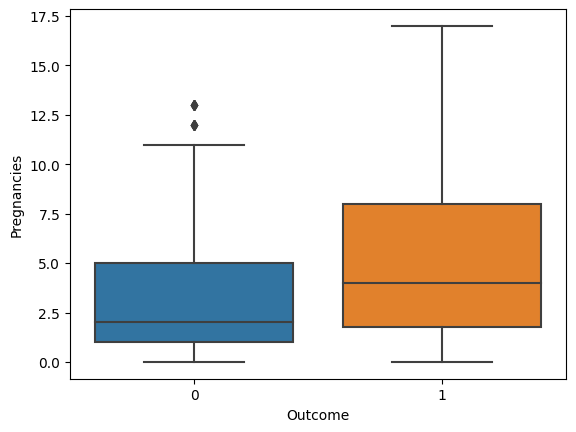

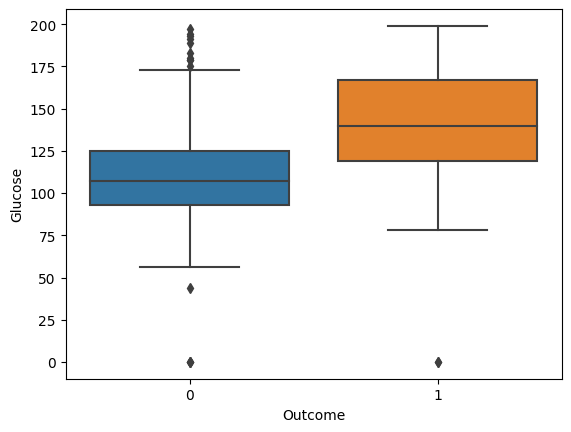

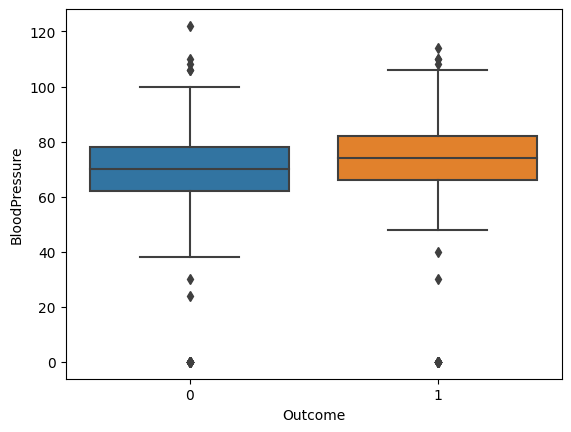

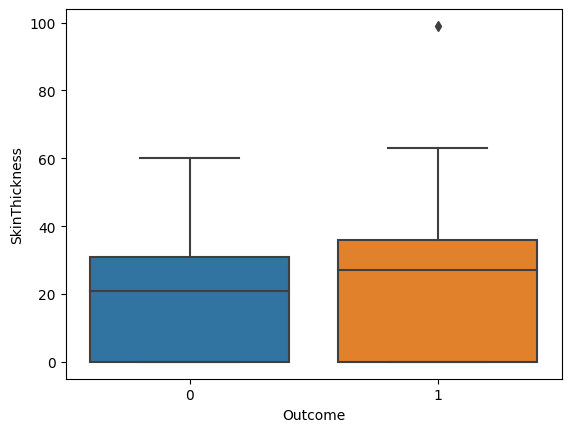

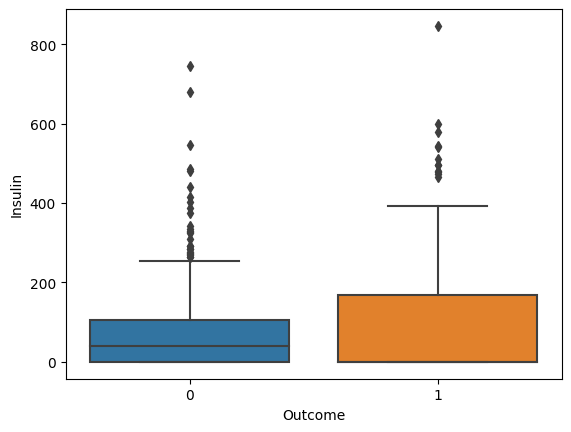

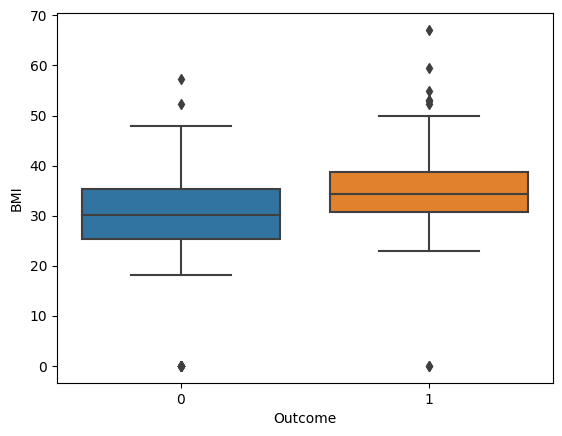

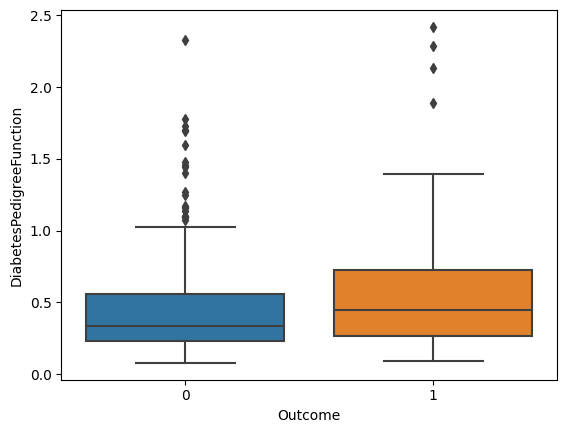

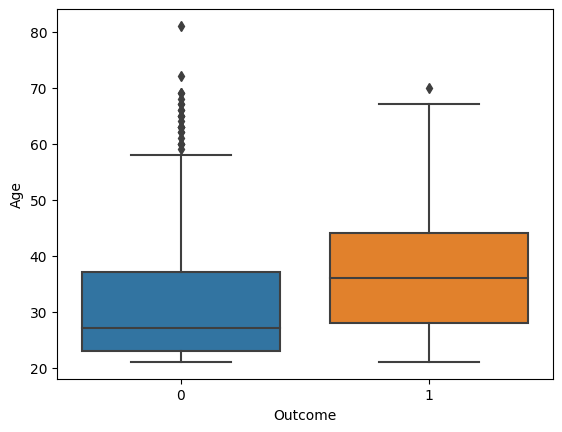

In [7]:
# Boxplot for each feature by 'Outcome'
for column in dataset.drop('Outcome', axis=1).columns:
    sns.boxplot(x='Outcome', y=column, data=dataset)
    plt.show()


In [8]:
# List of columns where zero values are biologically implausible and need to be replaced
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']


In [9]:
# Replace zero values in specified columns with the mean value of each column
for column in zero_not_accepted:
    dataset[column] = dataset[column].replace(0, np.NaN)
    mean = int(dataset[column].mean(skipna=True))
    dataset[column] = dataset[column].replace(np.NaN,mean)

In [10]:
# Count and display the number of occurrences for each unique value in the 'Outcome' column
dataset.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [11]:
# Split the dataset into features and target variable
X = dataset.drop('Outcome',axis=1).values
y = dataset['Outcome'].values

In [12]:
# Split the features and target variable into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 3)

In [13]:
# Initialize a standard scaler for feature scaling
scaler = StandardScaler()
# Scale the training data and then apply the same transformation to the test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Display the scaled training features
X_train

array([[ 1.28218502, -0.04206256, -0.04042055, ..., -0.33542348,
        -0.87864446,  0.40477138],
       [ 1.28218502,  0.15458523,  0.12841085, ..., -0.94748139,
        -0.94417118,  0.49106639],
       [ 0.05639817,  0.74452859, -1.22224031, ..., -0.41006469,
        -0.5541312 ,  0.31847637],
       ...,
       [ 0.05639817, -1.02530149, -0.04042055, ..., -0.63398831,
         0.45373211, -0.19929369],
       [-0.86294196, -0.33703424,  1.14139922, ..., -0.32049524,
        -1.00345726, -0.88965376],
       [ 0.6692916 , -0.20593571, -1.05340892, ...,  0.21692145,
        -0.68518463,  0.5773614 ]])

In [15]:
# Initialize the K-Nearest Neighbors classifier with 7 neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [16]:
# Train the K-Nearest Neighbors classifier on the training data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [17]:
# Use the trained KNN model to make predictions on the test data
y_pred = knn.predict(X_test)

In [18]:
# Generate a confusion matrix as a pandas DataFrame to compare actual and predicted values
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,80,12,92
1,28,34,62
All,108,46,154


In [19]:
# Print the classification report showing key metrics like precision, recall, f1-score for the model's predictions
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80        92
           1       0.74      0.55      0.63        62

    accuracy                           0.74       154
   macro avg       0.74      0.71      0.71       154
weighted avg       0.74      0.74      0.73       154



In [20]:
# Perform cross-validation and calculate the mean accuracy score
scores = cross_val_score(knn, X_train, y_train, cv=5)
print("Accuracy mean score from cross validiation", scores.mean())

Accuracy mean score from cross validiation 0.7687191789950687


In [21]:
# Print the array of accuracy scores obtained from cross-validation
print("Cross-validation scores:", scores)

Cross-validation scores: [0.78861789 0.74796748 0.74796748 0.79674797 0.76229508]


In [22]:
# Define a parameter grid for hyperparameter tuning, specifying a range of values for 'n_neighbors'
param_grid = {'n_neighbors': range(1,20)}

In [23]:
# Initialize GridSearchCV to perform exhaustive search over specified parameter values for the KNN model
grid_search = GridSearchCV(knn, param_grid, cv=5)

In [24]:
# Perform the grid search to find the best hyperparameters for the KNN model using the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=7),
             param_grid={'n_neighbors': range(1, 20)})

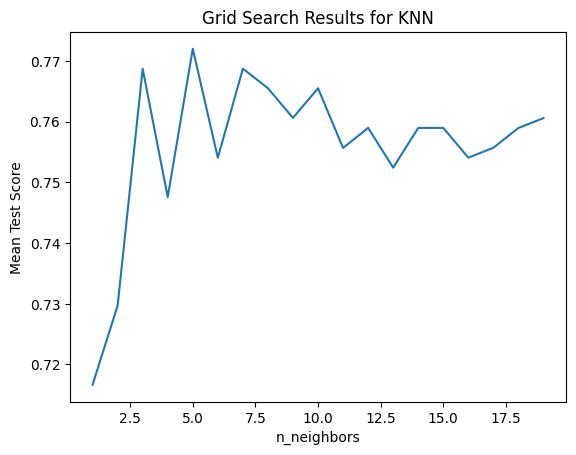

In [25]:
# Plot the results of grid search to visualize the impact of different 'n_neighbors' values on mean test score
plt.plot(param_grid['n_neighbors'], grid_search.cv_results_['mean_test_score'])
plt.xlabel('n_neighbors')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results for KNN')
plt.show()

In [26]:
# Calculate the ROC curve and AUC for model evaluation
y_pred_proba = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

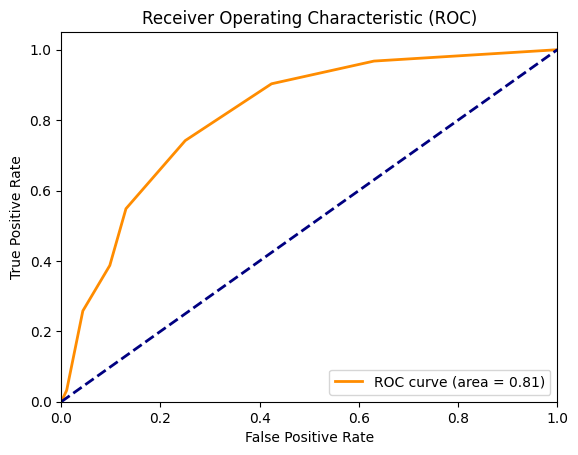

None


In [27]:
# Plot the Receiver Operating Characteristic (ROC) curve and display the AUC value
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
print(plt.show())

In [28]:
# Make predictions on the test data and calculate the accuracy of the model
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403